# Setup Environment (with Conda)

In [1]:
# conda create -n sentimen_ulasan_env python=3.11
# conda activate sentimen_ulasan_env
# pip install -r ./utils/requirements_utils.txt

## Import Libraries

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import pickle

## Set the Seed Value

In [4]:
SEED = 42
np.random.seed(SEED)

# Explanatory Data Analysis (EDA)

## Load Original Dataset

In [5]:
df = pd.read_csv('./../dataset/PRDECT-ID Dataset.csv')
df.head()

,Category,Product Name,Location,Price,Overall Rating,Number Sold,Total Review,Customer Rating,Customer Review,Sentiment,Emotion
0,Computers and Laptops,Wireless Keyboard i8 Mini TouchPad Mouse 2.4G ...,Jakarta Utara,53500,4.9,5449,2369,5,Alhamdulillah berfungsi dengan baik. Packaging...,Positive,Happy
1,Computers and Laptops,PAKET LISENSI WINDOWS 10 PRO DAN OFFICE 2019 O...,Kota Tangerang Selatan,72000,4.9,2359,1044,5,"barang bagus dan respon cepat, harga bersaing ...",Positive,Happy
2,Computers and Laptops,SSD Midasforce 128 Gb - Tanpa Caddy,Jakarta Barat,213000,5.0,12300,3573,5,"barang bagus, berfungsi dengan baik, seler ram...",Positive,Happy
3,Computers and Laptops,ADAPTOR CHARGER MONITOR LCD LED TV LG merek LG...,Jakarta Timur,55000,4.7,2030,672,5,bagus sesuai harapan penjual nya juga ramah. t...,Positive,Happy
4,Computers and Laptops,ADAPTOR CHARGER MONITOR LCD LED TV LG merek LG...,Jakarta Timur,55000,4.7,2030,672,5,"Barang Bagus, pengemasan Aman, dapat Berfungsi...",Positive,Happy


In [6]:
print('Columns: ', df.columns)

Columns:  Index(['Category', 'Product Name', 'Location', 'Price', 'Overall Rating',
       'Number Sold', 'Total Review', 'Customer Rating', 'Customer Review',
       'Sentiment', 'Emotion'],
      dtype='object')


## Basic Info

In [7]:
print('Shape: ', df.shape)
df.info()

Shape:  (5400, 11)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5400 entries, 0 to 5399
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Category         5400 non-null   object 
 1   Product Name     5400 non-null   object 
 2   Location         5400 non-null   object 
 3   Price            5400 non-null   int64  
 4   Overall Rating   5400 non-null   float64
 5   Number Sold      5400 non-null   int64  
 6   Total Review     5400 non-null   int64  
 7   Customer Rating  5400 non-null   int64  
 8   Customer Review  5400 non-null   object 
 9   Sentiment        5400 non-null   object 
 10  Emotion          5400 non-null   object 
dtypes: float64(1), int64(4), object(6)
memory usage: 464.2+ KB


In [8]:
print('Describe:')
df.describe()

Describe:


,Price,Overall Rating,Number Sold,Total Review,Customer Rating
count,5.400000e+03,5400.000000,5400.000000,5400.000000,5400.000000
mean,2.386961e+05,4.854389,15961.951852,2168.645556,3.087037
std,8.016337e+05,0.108259,74201.913338,2915.666035,1.766258
min,1.000000e+02,4.100000,9.000000,4.000000,1.000000
25%,2.000000e+04,4.800000,1630.000000,576.000000,1.000000
50%,5.990000e+04,4.900000,3794.500000,1192.000000,3.000000
75%,1.500000e+05,4.900000,9707.000000,2582.000000,5.000000
max,1.539900e+07,5.000000,1000000.000000,24500.000000,5.000000


## Label Visualization

In [9]:
# Value counts
print(f"Count:\n{df['Sentiment'].value_counts()}")

Count:
Sentiment
Negative    2821
Positive    2579
Name: count, dtype: int64


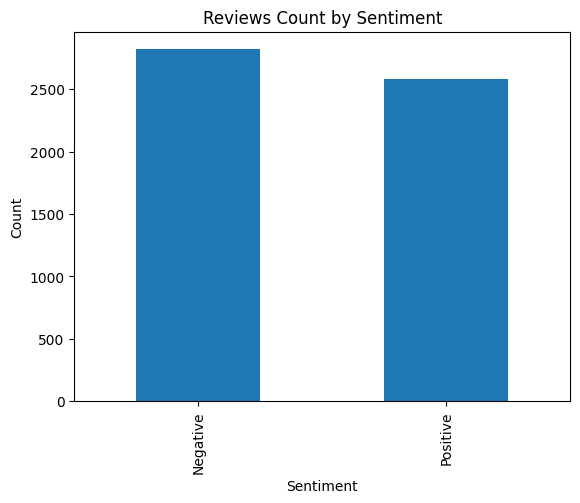

In [10]:
# Visualize the count using Bar Plot
df['Sentiment'].value_counts().plot(kind='bar')
plt.title('Reviews Count by Sentiment')
plt.ylabel('Count')
plt.show()

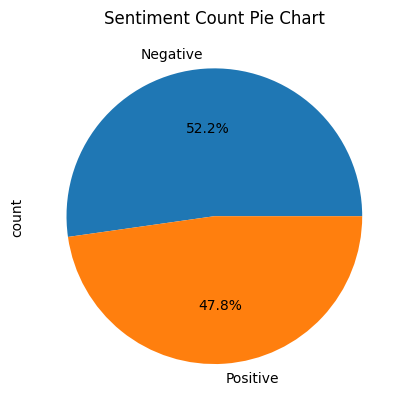

In [11]:
# Visualize the count using Pie Chart
df['Sentiment'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('Sentiment Count Pie Chart')
plt.show()

## Distribution of Length

Mean number of words: 16.095


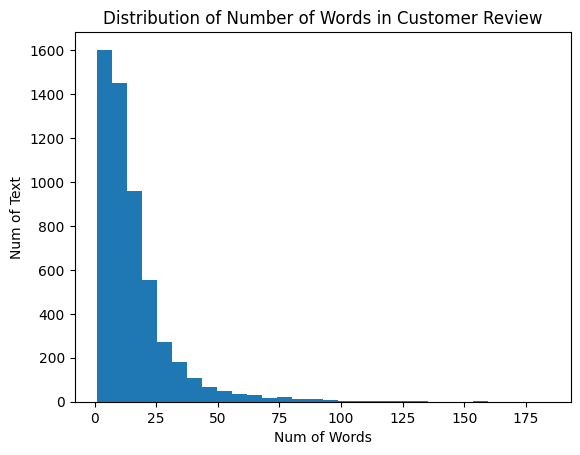

In [12]:
import statistics
seq_len = [len(text.split()) for text in df['Customer Review']]

print("Mean number of words:", statistics.mean(seq_len))

plt.hist(seq_len, bins=30)
plt.xlabel('Num of Words')
plt.ylabel('Num of Text')
plt.title('Distribution of Number of Words in Customer Review')
plt.show()

# Set the maximum length of the input sequence
MAX_LENGTH = 50 

# Dataset

## Load the Cleaned Dataset (from preprocess.ipynb)

In [13]:
df_clean = pd.read_csv('./../dataset/cleaned_dataset.csv')
df_clean.head()

,text,id
0,alhamdulillah fungsi baik packaging aman respo...,1
1,barang bagus respon cepat harga saing,1
2,barang bagus fungsi baik seler ramah kirim cepat,1
3,bagus sesuai harap jual ramah trimakasih lapak,1
4,barang bagus emas aman fungsi baik,1


In [14]:
# Value counts
print(f"Count:\n{df_clean['id'].value_counts().sort_index()}")

Count:
id
0    2751
1    2552
Name: count, dtype: int64


## Word Cloud

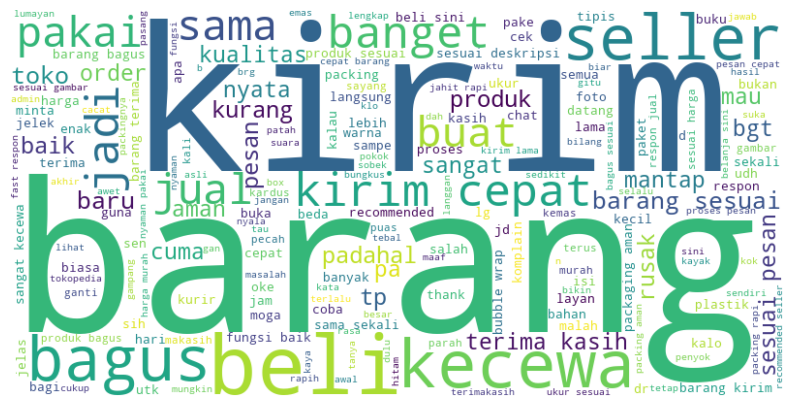

In [15]:
from wordcloud import WordCloud

text_data = ' '.join(str(item) for item in df_clean['text'])
wc = WordCloud(width=800, height=400, max_words=200, background_color='white').generate(text_data)
plt.figure(figsize=(10, 10))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.show()

## Data Splitting

In [16]:
from sklearn.model_selection import train_test_split

# Split the data into training and temp sets
train_df, test_df = train_test_split(df_clean, test_size=0.2, random_state=SEED, stratify=df_clean['id'])

# Training 80%, Validation 10%, Test 10%
X_train = train_df['text'].tolist()
y_train = train_df['id'].tolist()
X_test = test_df['text'].tolist()
y_test = test_df['id'].tolist()

# Shape
print(f'Shape (before split):\n{df_clean.shape}\n')
print(f'Shape (after split):\nTrain: {train_df.shape}\nTest: {test_df.shape}')

Shape (before split):
(5303, 2)

Shape (after split):
Train: (4242, 2)
Test: (1061, 2)


# Word Embedding

## Vectorization Using TF-IDF to Turn It Into Sparse Matrix

In [17]:
from sklearn.feature_extraction.text import TfidfVectorizer

vect = TfidfVectorizer(ngram_range=(1, 3), max_features=4500, max_df=0.9, min_df=2)
X_train_tfidf = vect.fit_transform(X_train)
X_test_tfidf = vect.transform(X_test)

X_train_tfidf = X_train_tfidf.toarray()
X_test_tfidf = X_test_tfidf.toarray()

print(f'Shape (after vectorization):\nX train: {X_train_tfidf.shape}\nX test: {X_test_tfidf.shape}')

Shape (after vectorization):
X train: (4242, 4500)
X test: (1061, 4500)


# Modelling

## Model Selection & Validation using Grid Search Cross Validation

In [18]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB, MultinomialNB, ComplementNB
from sklearn.svm import SVC

# Model parameters that will be tested
model_params = {
    'lgr': {
        'model': LogisticRegression(random_state = SEED), # Logistic Regression model
        'params': {
            'C': [0.1, 0.5, 1.0, 1.5, 2.0], # Controls regularization strength (inverse); smaller values mean stronger regularization.
            'max_iter': [100, 200, 300, 400, 500], # Maximum iterations for convergence
            'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'] # Optimization algorithm
        }
    },

    # - newton-cg: An optimization algorithm that uses Newton's method with a conjugate gradient approach. It is suitable for large datasets and supports L2 regularization.
    # - lbfgs: Stands for Limited-memory Broyden–Fletcher–Goldfarb–Shanno algorithm. It is an optimization algorithm that approximates the Broyden–Fletcher–Goldfarb–Shanno (BFGS) algorithm using limited memory. It is efficient for large datasets and supports L2 regularization.
    # - sag: Stands for Stochastic Average Gradient. It is an optimization algorithm that is faster for large datasets and suitable for L2 regularization. It approximates the gradient of the entire dataset by averaging the gradients of subsets of data.
    # - saga: An extension of SAG that supports L1 regularization (sparse datasets) in addition to L2 regularization. It combines the benefits of both SAG and the ability to handle sparsity.

    'gnb': {
        'model': GaussianNB(), # Gaussian Naive Bayes model
        'params': {
            'var_smoothing': [1e-9, 1e-8, 1e-7, 1e-6, 1e-5] # Smoothing parameter to handle numerical stability
        }
    },

    'mnb': {
        'model': MultinomialNB(), # Multinomial Naive Bayes model
        'params': {
            'alpha': [0.1, 0.5, 1.0, 1.5, 2.0], # Additive smoothing parameter
            'fit_prior': [True, False] # Whether to learn class prior probabilities
        }
    },

    'cnb': {
        'model': ComplementNB(), # Complement Naive Bayes model (for imbalanced data)
        'params': {
            'alpha': [0.1, 0.5, 1.0, 1.5, 2.0], # Additive smoothing parameter
            'fit_prior': [True, False] # Whether to learn class prior probabilities
        }
    }
}

In [19]:
from sklearn.model_selection import GridSearchCV

gs_results = []

# Iteratively test the models and cross validate
for key, values in model_params.items():
    gs = GridSearchCV(values['model'], values['params'], scoring='f1', cv=4, n_jobs=-1) # Using cv=4 so the validation size the same as the test size
    gs.fit(X_train_tfidf, y_train)
    gs_results.append(
        {
            'model': key,
            'best_param': gs.best_params_,
            'best_score': gs.best_score_,
            'std_of_best': gs.cv_results_['std_test_score'][gs.best_index_]
        }
    )

gs_results_pd = pd.DataFrame(gs_results, columns=['model', 'best_param', 'best_score', 'std_of_best'])
gs_results_pd

,model,best_param,best_score,std_of_best
0,lgr,"{'C': 2.0, 'max_iter': 100, 'solver': 'lbfgs'}",0.914973,0.004248
1,gnb,{'var_smoothing': 1e-05},0.857889,0.008306
2,mnb,"{'alpha': 0.5, 'fit_prior': False}",0.911902,0.005001
3,cnb,"{'alpha': 0.5, 'fit_prior': True}",0.911902,0.005001


In [20]:
# Get the best model
best_model = gs_results_pd.sort_values(by=['best_score'], ascending=False).iloc[0,:]
print('Best Model:')
for key, value in best_model.items():
    print(f'{key}: {value}')

Best Model:
model: lgr
best_param: {'C': 2.0, 'max_iter': 100, 'solver': 'lbfgs'}
best_score: 0.9149728628857231
std_of_best: 0.004247654863132855


Having a high f1 score with a low standard deviation means the model has low bias and low variance, which is what we want. High variance can indicate that the model is overfitting to the training set. In contrast, high bias can suggest that the model is underfitting and too simple, meaning that it can't capture the data features to make a good prediction.

## Train the Best Tested Model using the Whole Training Set

In [22]:
# use the best model
clf = LogisticRegression()
clf.set_params(**best_model['best_param'])
clf.fit(X_train_tfidf, y_train)

LogisticRegression(C=2.0)

# Evaluation

## Predict the Test Set

In [23]:
# Get the predictions
y_pred = clf.predict(X_test_tfidf)

In [24]:
import json

# Load JSON data from file
with open('utils.json', 'r') as f:
    utils = json.load(f)

print(utils)

{'id2label': {'0': 'Negative', '1': 'Positive'}, 'label2id': {'Negative': 0, 'Positive': 1}, 'stopwords': ['yang', 'untuk', 'pada', 'ke', 'para', 'namun', 'menurut', 'antara', 'dia', 'dua', 'ia', 'seperti', 'jika', 'jika', 'sehingga', 'kembali', 'dan', 'tidak', 'ini', 'karena', 'kepada', 'oleh', 'saat', 'harus', 'sementara', 'setelah', 'belum', 'kami', 'sekitar', 'bagi', 'serta', 'di', 'dari', 'telah', 'sebagai', 'masih', 'hal', 'ketika', 'adalah', 'itu', 'dalam', 'bisa', 'bahwa', 'atau', 'hanya', 'kita', 'dengan', 'akan', 'juga', 'ada', 'mereka', 'sudah', 'saya', 'terhadap', 'secara', 'agar', 'lain', 'anda', 'begitu', 'mengapa', 'kenapa', 'yaitu', 'yakni', 'daripada', 'itulah', 'lagi', 'maka', 'tentang', 'demi', 'dimana', 'kemana', 'pula', 'sambil', 'sebelum', 'sesudah', 'supaya', 'guna', 'kah', 'pun', 'sampai', 'sedangkan', 'selagi', 'sementara', 'tetapi', 'apakah', 'kecuali', 'sebab', 'selain', 'seolah', 'seraya', 'seterusnya', 'tanpa', 'agak', 'boleh', 'dapat', 'dsb', 'dst', 'dll',

In [25]:
target_names = [utils['id2label'][str(i)] for i in range(len(utils['id2label']))]

## Confusion Matrix

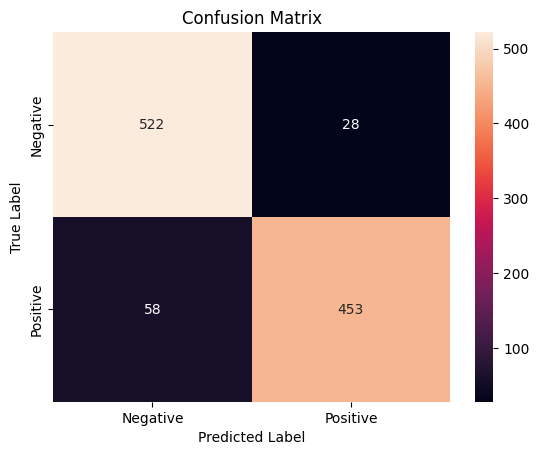

In [26]:
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

cm = confusion_matrix(y_test, y_pred)
ax = sns.heatmap(cm, annot=True, fmt='d', xticklabels=target_names, yticklabels=target_names)
ax.set_xlabel('Predicted Label')
ax.set_ylabel('True Label')
ax.set_title('Confusion Matrix')
plt.show()

## Classification Report

In [27]:
print('Classification Report:')
print(classification_report(y_test, y_pred, target_names=target_names))
print('ROC AUC Score:', roc_auc_score(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

    Negative       0.90      0.95      0.92       550
    Positive       0.94      0.89      0.91       511

    accuracy                           0.92      1061
   macro avg       0.92      0.92      0.92      1061
weighted avg       0.92      0.92      0.92      1061

ROC AUC Score: 0.9177939868350827


Achieving a high performance score alongside a high ROC AUC score indicates that a model can effectively distinguish between labels.

# Save Model & Vectorizer

In [28]:
with open("./model.pickle", "wb") as f:
    pickle.dump(clf, f)

with open("./vectorizer.pickle", "wb") as f:
    pickle.dump(vect, f)